<a href="https://colab.research.google.com/github/MatiasMercandino/predicciones-ventas-/blob/main/Sales_Predictions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Informacion del data frame



*   Podria pasar Outlet_Establishment_Year a tipo Fecha
*   Elemento de lista



In [ ]:
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Graficar datos nulos

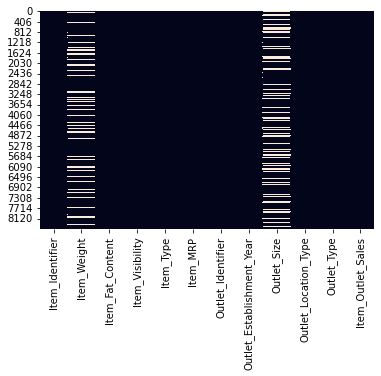

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Datos estadisticos del data frame

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Trabajando datos nulos columna Item_Weight


*   Item_Weight (Variable Numerica), para esta columna, sacare un promedio y lo agregare en los NaN existentes.  
*   Haciendo un groupby del peso por año nos podemos dar cuenta que aquellos datos nulos en la columna Item_Weight corresponden al año 1985.     
*   Filtrare por año y luego al año 1985 le cambiare los valores nulos por el promedio de los otros años





In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df=df.sort_values("Outlet_Establishment_Year",ascending=True)
df.Item_Weight.values[0:1463] = round(df["Item_Weight"].mean(),2)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4338,FDH21,12.86,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
3689,FDD53,12.86,Low Fat,0.044008,Frozen Foods,43.7454,OUT027,1985,Medium,Tier 3,Supermarket Type3,671.1264
1139,FDH26,12.86,Regular,0.034532,Canned,142.2496,OUT027,1985,Medium,Tier 3,Supermarket Type3,2399.5432
1138,FDM21,12.86,Low Fat,0.064052,Snack Foods,256.1646,OUT027,1985,Medium,Tier 3,Supermarket Type3,7472.2734
3691,FDY36,12.86,Low Fat,0.016477,Baking Goods,74.3380,OUT019,1985,Small,Tier 1,Grocery Store,146.4760


In [ ]:
############una forma para cambiar valores de datos nulos ################
#df["Item_Weight"].fillna(round(df["Item_Weight"].mean(),2))  


###############Filtrando datos nulos#########################

#weight_null = df[df.Item_Weight.isnull()]  
#weight_null

# Trabajando datos nulos columna Outlet_Size


*   Outlet_Size (Variable Categorica). Se puede ver que Aquellos Size = High son pocos comparados con los otros 2, por lo tanto podria agregar este High a aquellos datos nulos.
*   Haciendo un groupby del peso por año nos podemos dar cuenta que aquellos datos nulos en la columna Item_Weight corresponden al año 1985.                


In [ ]:
df[["Outlet_Size"]].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [ ]:
df['Outlet_Size'].fillna("High", inplace=True)
df[["Outlet_Size"]].value_counts()

Outlet_Size
High           3342
Medium         2793
Small          2388
dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
###################Filtrando datos nulos #########################3

#size_null = df[df.Outlet_Size.isnull()]  
#size_null[["Outlet_Establishment_Year","Outlet_Size"]]
#size_null.Outlet_Size.values[0:2410]="High"
#size_null

# Trabajando con la data ya Limpia

In [ ]:
# Trabajar variables con tabla pivotes 
# ver id con sus peso 

# Ordenando data por año


In [ ]:
df=df.sort_values("Outlet_Establishment_Year",ascending=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4338,FDH21,12.86,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
7499,FDE56,12.86,Regular,0.278731,Fruits and Vegetables,63.2194,OUT019,1985,Small,Tier 1,Grocery Store,247.6776
3689,FDD53,12.86,Low Fat,0.044008,Frozen Foods,43.7454,OUT027,1985,Medium,Tier 3,Supermarket Type3,671.1264
1139,FDH26,12.86,Regular,0.034532,Canned,142.2496,OUT027,1985,Medium,Tier 3,Supermarket Type3,2399.5432
1138,FDM21,12.86,Low Fat,0.064052,Snack Foods,256.1646,OUT027,1985,Medium,Tier 3,Supermarket Type3,7472.2734


# Agrupaciones y filtros


1.   Quiero saber como ha ido variando el peso de los productos a lo largo de los años.
2.   Que tipo de producto es el que mas se vende?



Grupo 1, Cantidad de productos por año

In [ ]:
# conseguir número de producto por año
numberUniqueYear = df.groupby(['Outlet_Establishment_Year'])['Item_Identifier'].nunique()
# esta es una serie de pandas
numberUniqueYear

Outlet_Establishment_Year
1985    1142
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Item_Identifier, dtype: int64

Text(1995, 700, 'Estan fuera de la concentracion de datos')

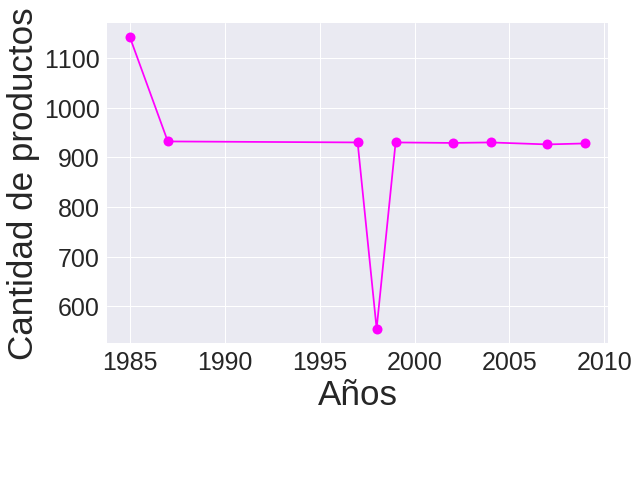

In [ ]:
uniqueYears = list(numberUniqueYear.index)
uniqueYears
numproductos = list(numberUniqueYear.values)
numproductos
plt.style.use('seaborn')
plt.plot(uniqueYears, numproductos,c = 'magenta', marker = '.', markersize = 20)
plt.xlabel("Años",fontsize=35)
plt.ylabel("Cantidad de productos",fontsize=35)
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);

plt.annotate('Estan fuera de la concentracion de datos', xy=(1996,200), xytext=(1995,700), arrowprops=dict(facecolor='black', shrink=0.05))

Grupo 2, Cantidad de productos por tipo 

In [ ]:
a=df.groupby(['Item_Type'])['Item_Identifier'].nunique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


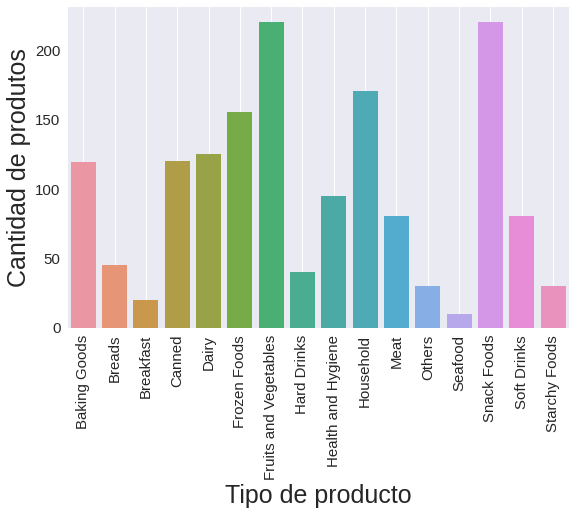

In [ ]:
#plt.bar(a.index, a.values);

sns.barplot(a.index, a.values);
plt.grid();
plt.xlabel("Tipo de producto",fontsize = 25)
plt.ylabel("Cantidad de produtos",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

In [ ]:
r=df.groupby("Item_Type")["Item_Type"].count()
r

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

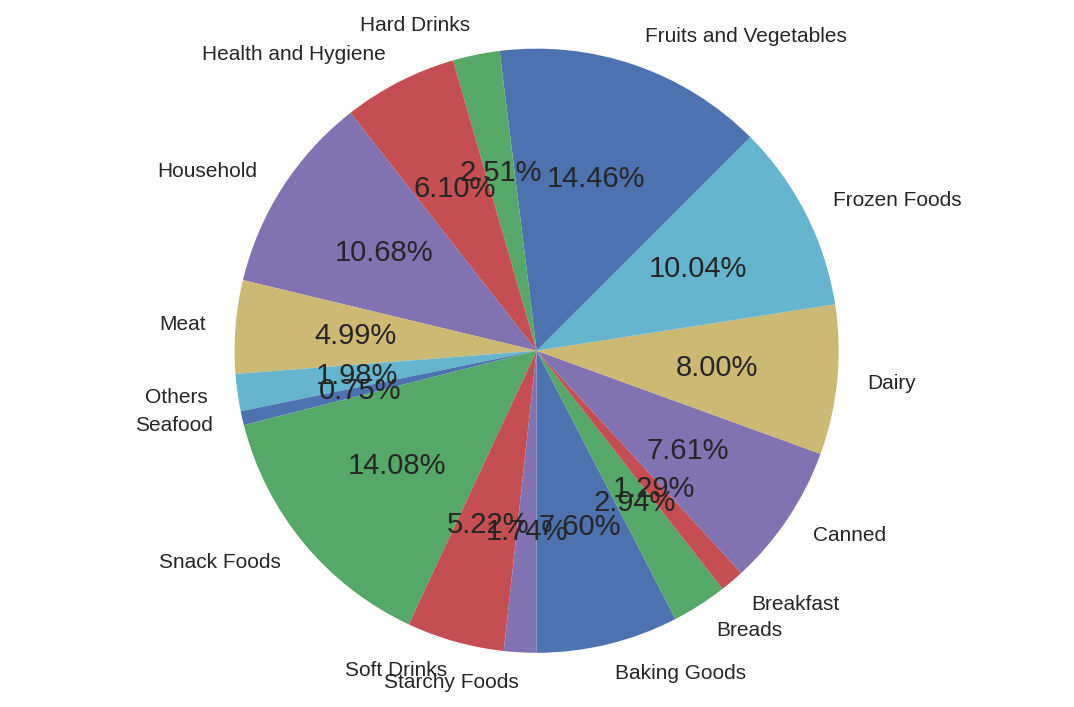

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = r.values
etiquetas = r.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

% que representa cada Size

In [ ]:
Size=df.groupby("Outlet_Size")["Outlet_Size"].count()
Size

Outlet_Size
High      3342
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

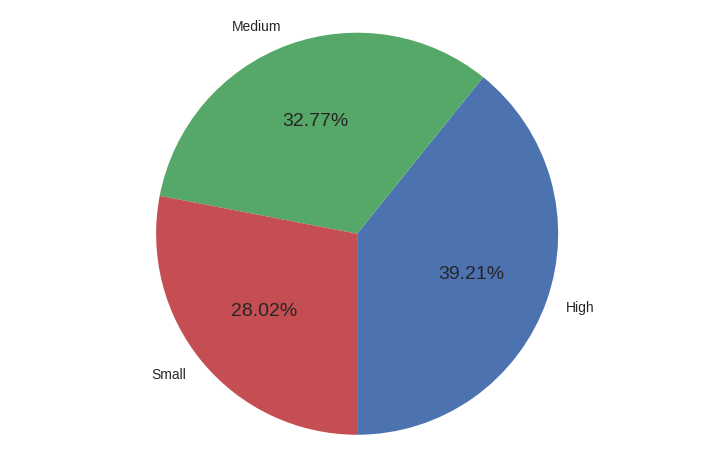

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = Size.values
etiquetas = Size.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

Grafico que representa en cual supermercado hay una mayor cantidad de productos

In [ ]:
typo=df.groupby("Outlet_Type")["Outlet_Type"].count()
typo

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

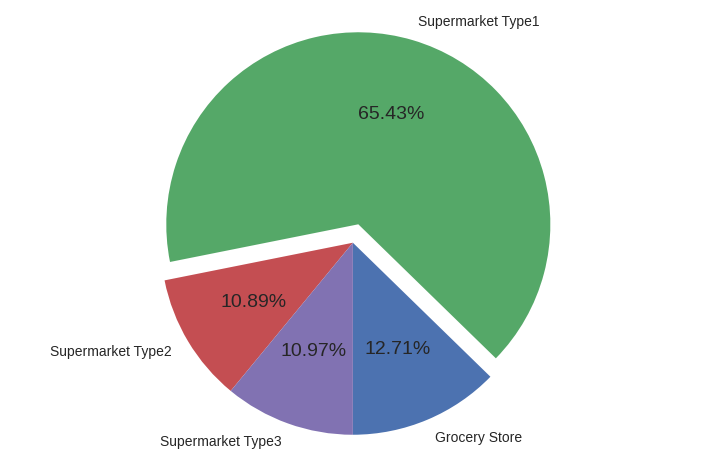

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = typo.values
etiquetas = typo.index
explotar = [0, 0.1, 0, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

Grafico peso promedio segun tipo de producto

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


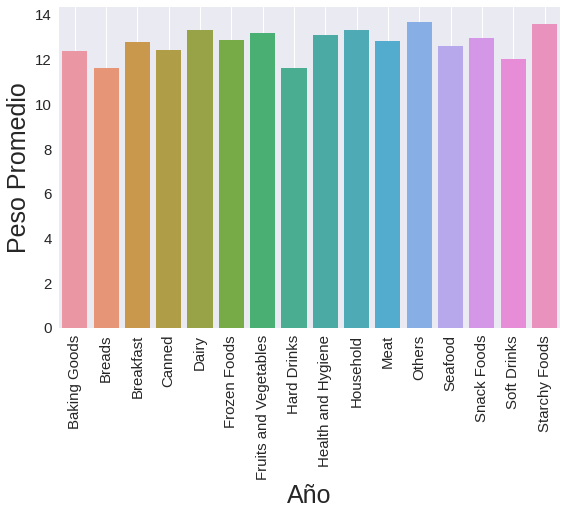

In [ ]:
c=df.groupby(['Item_Type'])['Item_Weight'].mean()
sns.barplot(c.index, c.values);
plt.grid();
plt.xlabel("Año",fontsize = 25)
plt.ylabel("Peso Promedio",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

Grupo 3, peso promedio de los productos a lo largo de los años


In [ ]:
b=df.groupby(['Outlet_Establishment_Year'])['Item_Weight'].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


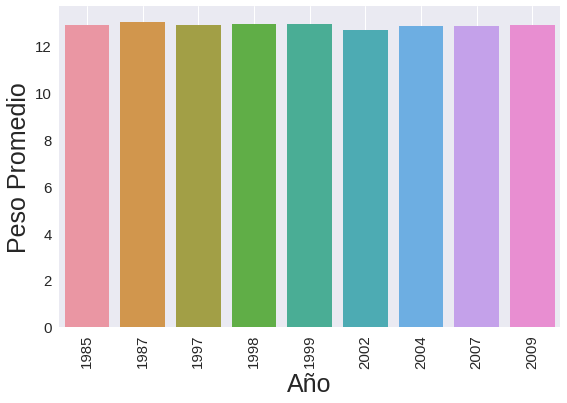

In [ ]:
sns.barplot(b.index, b.values);
plt.grid();
plt.xlabel("Año",fontsize = 25)
plt.ylabel("Peso Promedio",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

Grafico items vendidos por año

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


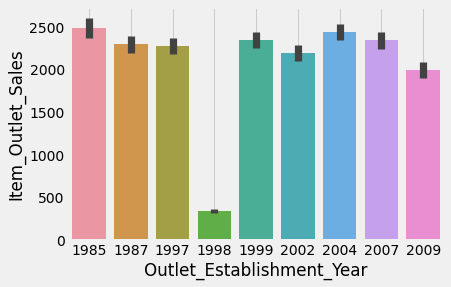

In [ ]:
#plt.bar(df["Region"], df["Import in tonnes"]);
#plt.grid()
import seaborn as sns
sns.barplot(df["Outlet_Establishment_Year"], df["Item_Outlet_Sales"]);
plt.grid();
#plt.xticks(rotation = 90);

# Graficar por año distintas variables

Todos en un mismo grafico

In [ ]:
### figura1
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,3,1) #1 fila, 1 columna y gráfico 1.
ax1.plot(df["Year"], df["Import in tonnes"], 'o--', color="orchid", markerfacecolor="lightgreen", lw=2, ms=10)
plt.xticks(rotation = 90);

ax2 = fig1.add_subplot(1,3,2) #1 fila, 1 columna y gráfico 1.
ax2.plot(df["Year"], df["Import in tonnes"], 'o--', color="red", markerfacecolor="yellow", lw=1, ms=10)
plt.xticks(rotation = 90);

ax3 = fig1.add_subplot(1,3,3) #1 fila, 1 columna y gráfico 1.
ax3.plot(df["Year"], df["Import in tonnes"], 'o--', color="red", markerfacecolor="blue", lw=1, ms=10)
plt.xticks(rotation = 90);
plt.tight_layout()

Subplots, graficos separados


In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
# Subplot 1 
plt.subplot(1, 3, 1);
plt.plot(Region1["Year"], Region1["Import in tonnes"], c = 'r',marker=".",markersize=20,label="Asia & Oceania");
plt.xticks(rotation = 90);
plt.ylabel("Importaciones [Toneladas]",fontsize=15)
plt.title("Importaciones por Año", fontsize=15)
plt.grid()
plt.legend()

#plt.scatter(df_intercept['feature'].values, df_intercept['actual'].values, c= 'k');
#plt.title('intercept', fontsize = 12);
# Subplot 2
plt.subplot(1, 3, 2);
plt.plot(Region2["Year"], Region2["Import in tonnes"], c = 'b',marker="p",markersize=20,label="Europe");
plt.xticks(rotation = 90);
plt.ylabel("Importaciones [Toneladas]",fontsize=15)
plt.title("Importaciones por Año", fontsize=15)
plt.grid()
plt.legend()

#plt.scatter(df_nointercept['feature'].values, df_nointercept['actual'].values, c= 'k');
#plt.title('no intercept', fontsize = 12);
plt.subplot(1, 3, 3);
plt.plot(Region3["Year"], Region3["Import in tonnes"], c = 'y',marker="*",markersize=20,label="Americas");
plt.xticks(rotation = 90);
plt.ylabel("Importaciones [Toneladas]",fontsize=15)
plt.title("Importaciones por Año", fontsize=15)
plt.grid()
plt.legend()

plt.tight_layout()


Histogramas

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 100 #media 
sigma = 15 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * randn(2000)
print(randn(2000))

#datos histograma
num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(x, num_bins, density=True)

ax1.set_xlabel("IQ")
ax1.set_ylabel("Probabilidad")
ax1.set_title("Histograma de IQ")

plt.show()